# Homework #4 Part I: Fit this model using HMC in `PyMC`

For the model specification example considered in "Metropolis within Gibbs" above...


## Provide posterior analysis for this model using "default" `PyMC` 

- Don't try to do "Metropolis within Gibbs" `in PyMC` -- you can't -- use the default HMC sampler
- You can do this without knowing what HMC is: you've already previously used HMC with `PyMC`; and, you can go get the distributions you need [here...](https://www.pymc.io/projects/docs/en/stable/api/distributions.html)
- ***Explore and describe the sample sizes needed to support inference regarding the `df` parameter $(\nu)$***

*Ahem...*

- Is it eating you up inside that you don't know what HMC actualy is? 
- Do you hate just using something without knowing what it is?<br>Or what you're even doing when you use it? 

*Well then, my friends, have I got the cure for you!*<br>All **you** must **do** is listen **to** someone **who** will re**view** for **you** the next slides **few**!



# Solution:

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
Only 100 samples in chain.


Effective sample size for df parameter is: df    808.88
Name: ess_bulk, dtype: float64


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 1 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sample size: 100
         mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
loc     9.711   0.202   9.350   10.123      0.010    0.007     407.0   
df     62.362  24.165  24.000  101.000      2.329    1.695     105.0   
scale   2.080   0.147   1.828    2.363      0.009    0.006     319.0   

       ess_tail  r_hat  
loc       305.0   1.01  
df         37.0   1.06  
scale     227.0   1.03  


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 2 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sample size: 500
         mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
loc     9.708   0.208    9.31   10.084      0.004    0.003    2314.0   
df     60.761  25.165   21.00  101.000      1.287    0.911     369.0   
scale   2.079   0.146    1.82    2.348      0.003    0.002    1757.0   

       ess_tail  r_hat  
loc      1381.0    1.0  
df        426.0    1.0  
scale    1333.0    1.0  


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


Sample size: 1000
         mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
loc     9.707   0.216   9.316   10.143      0.003    0.002    4266.0   
df     60.828  25.127  19.000  101.000      0.866    0.647     821.0   
scale   2.079   0.155   1.796    2.373      0.003    0.002    3484.0   

       ess_tail  r_hat  
loc      2786.0   1.00  
df        880.0   1.01  
scale    2592.0   1.00  


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


Sample size: 2000
         mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
loc     9.711   0.213   9.328   10.132      0.002    0.002    8152.0   
df     61.395  25.025  21.000  101.000      0.638    0.451    1540.0   
scale   2.082   0.157   1.796    2.381      0.002    0.001    7368.0   

       ess_tail  r_hat  
loc      6051.0    1.0  
df       1601.0    1.0  
scale    5469.0    1.0  


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [loc, scale]
>Metropolis: [df]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 6 seconds.


Sample size: 5000
         mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
loc     9.710   0.214   9.315   10.114      0.002    0.001   19855.0   
df     61.193  24.434  21.000  101.000      0.381    0.270    4017.0   
scale   2.083   0.157   1.792    2.372      0.001    0.001   19317.0   

       ess_tail  r_hat  
loc     14288.0    1.0  
df       4549.0    1.0  
scale   14998.0    1.0  


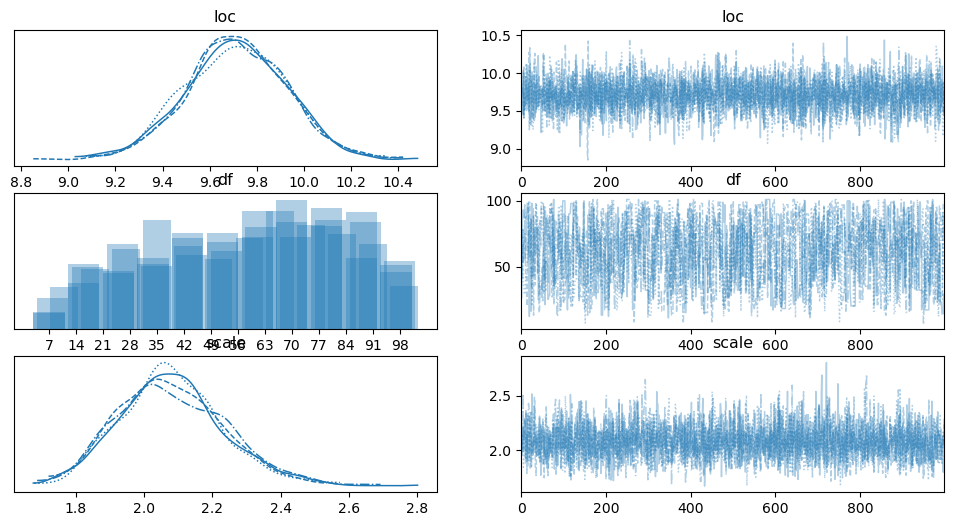

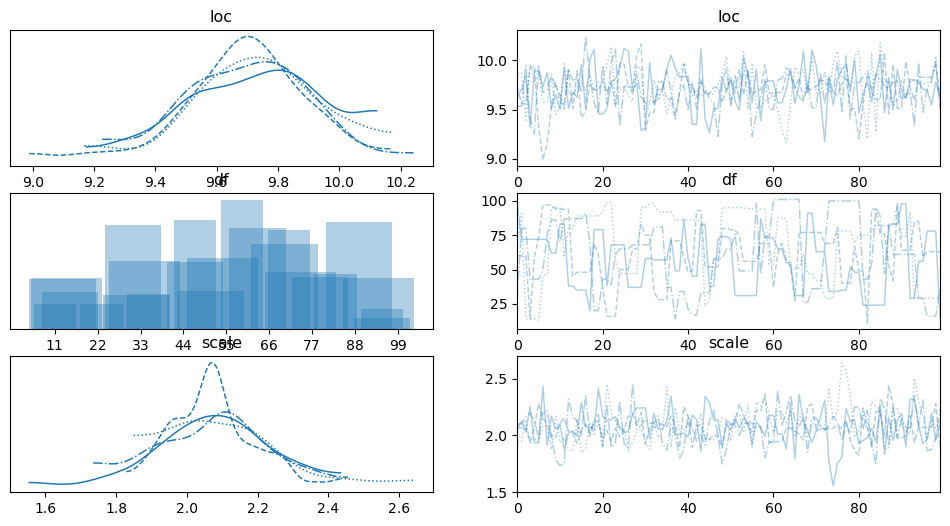

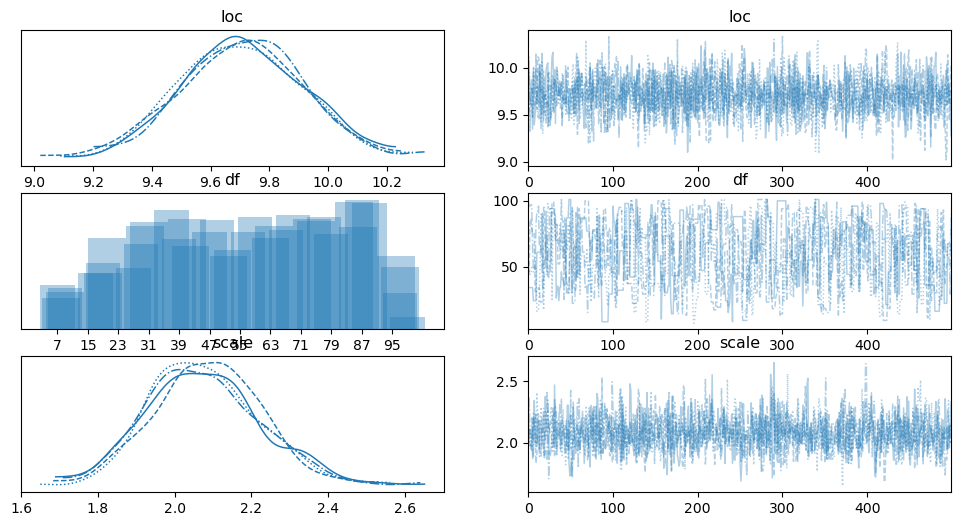

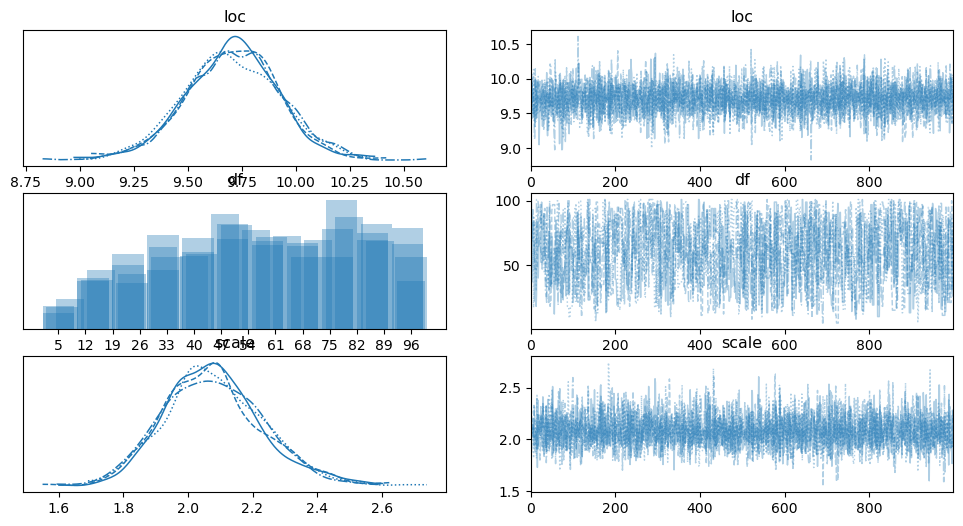

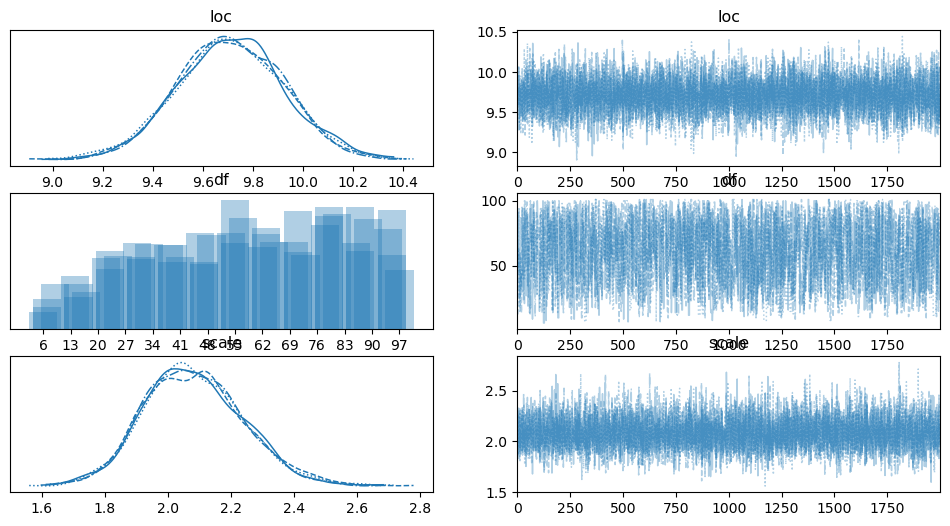

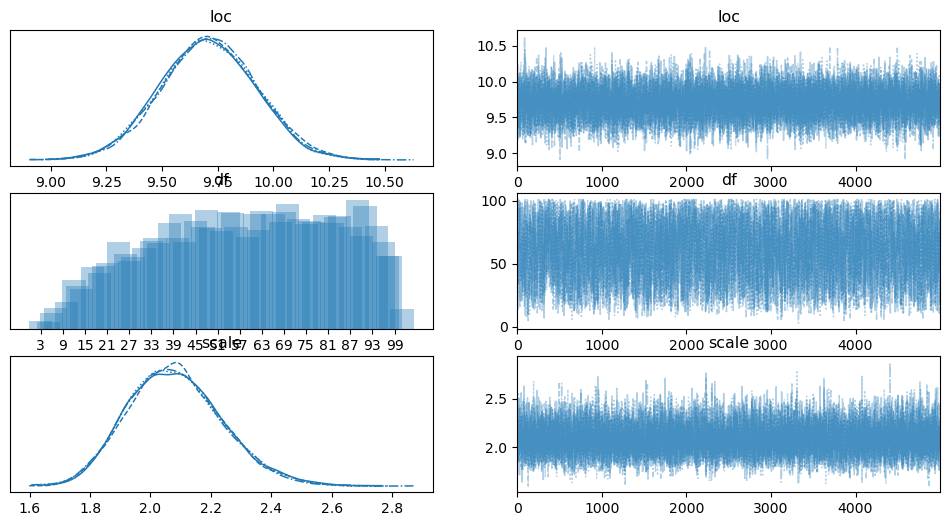

In [81]:
import pymc as pm
import numpy as np
from scipy import stats
import arviz as az

# Generate example data
mu_0, sigma_0 = 0, 10
n, loc_true, scale_true, df_true = 100, 10, 2, 15
data = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)

# Model Specification using HMC
with pm.Model() as model:
    # Prior distribution for the unknown parameters
    loc = pm.Normal('loc', mu=mu_0, sigma=sigma_0)
    scale = pm.HalfNormal('scale', sigma=5)
    df = pm.DiscreteUniform('df', lower=1, upper=101)
    
    # Likelihood
    likelihood = pm.StudentT('likelihood', nu=df, mu=loc, lam=1/scale**2, observed=data)
    
    # Sampling using HMC
    trace = pm.sample()

# Analyzing the posterior samples
az.plot_trace(trace)
az.summary(trace, round_to=2)

# Describe the sample sizes needed for the df parameter
df_summary = az.summary(trace, var_names=['df'], round_to=2)
df_ess = df_summary['ess_bulk']  # Effective sample size for the df parameter
print(f"Effective sample size for df parameter is: {df_ess}")

# Explore sample sizes
sample_sizes = [100, 500, 1000, 2000, 5000]
for size in sample_sizes:
    with model:
        trace = pm.sample(draws=size)  # Change the number of draws for different sample sizes
        # Assess posterior distribution of nu and monitor convergence
        summary = pm.summary(trace)
        print(f"Sample size: {size}")
        print(summary)
        az.plot_trace(trace)

# Homework #4 Part II: HMC Diagnostics 

- Return to your posterior analysis in "Homework #4 Part I" and 
report on (a) ***effective sample sizes***; (b) ***chain convergence measures***; (c) ***divergences***; (d) ***Metropolis-Hastings acceptance rates*** [see below for how to access these]; and (e) any other warnings or concers provided by `PyMC` 

- Now examine the [Eight Schools](https://github.com/pointOfive/STA410_W24_StatisticalComputation/blob/main/Week3/STA410_W24_Week3_Demo_HMCwithPyMC.ipynb) example PyMC model and outputted results
    - Provide an analogous report regarding (a)-(e) above for the "centered" and "uncentered" Eight Schools models
        - *Hint: for (d) see `fit_C.sample_stats.acceptance_rate.values.flatten()` and `fit_NC.sample_stats.acceptance_rate.values.flatten()` and in the Eight Schools example* 
    - From the perspective of ***curvature*** of the ***energy function*** (that is, how rapidly the ***log joint posterior distribution density*** changes for different values of its ***random variable (parameters)*** and the effectiveness of the ***HMC*** algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization
        - *Hint: see the previous two slides...*
- Review [this](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html#model-checking) and [that](https://discourse.pymc.io/t/about-nuts-sampling-and-energy-plot/831) discussing the ***diagnostic plot*** which compares the ***observed energy proposal distribution*** versus the ***empirical energy distribution*** of the generated HMC samples
    - Use the code on the next slide to provide and interpret the ***diagnostic plot*** assessing ***energy proposals*** versus the empirical ***energy*** distribution to compare and contrast the "centered" and "uncentered" Eight Schools models in relation to you previous comparision of these two model parameterization in terms of ***energy function curvature*** and the effectiveness of the ***HMC*** algorithm... does this diagnostic support your previous conclusions in these regards?




# Solution:

In [73]:
import pymc as pm
import numpy as np
from scipy import stats
import arviz as az

# Define your PyMC model and perform sampling
# (Assuming you have already defined and sampled your model as in your previous code)

# Collect posterior analysis statistics
# (a) Effective Sample Sizes (ESS)
ess_summary = az.summary(trace, var_names=['loc', 'scale', 'df'], round_to=2)
ess_values = ess_summary[['ess_bulk', 'ess_tail', 'r_hat']]

# Print the report
print("Posterior Analysis Report:")
print("---------------------------")
print("(a) Effective Sample Sizes (ESS):")
print(ess_values)

Posterior Analysis Report:
---------------------------
(a) Effective Sample Sizes (ESS):
       ess_bulk  ess_tail  r_hat
loc    20957.53  15704.15    1.0
scale   8166.48   6385.79    1.0
df      2993.33   2616.06    1.0


AttributeError: 'DataArray' object has no attribute 'data_vars'

In [ ]:
# (b) Compute Gelman-Rubin statistic 
# Convert the trace to InferenceData
idata = az.convert_to_inference_data(trace)

# Extracting the trace values
chain_loc = idata.posterior["loc"].values
chain_scale = idata.posterior["scale"].values
chain_df = idata.posterior["df"].values

# Calculate Gelman-Rubin diagnostic
N = int(chain_loc.shape[0] / 2)  # Burn-in period
W_loc = (chain_loc[-N:].std() ** 2) / 2
W_scale = (chain_scale[-N:].std() ** 2) / 2
W_df = (chain_df[-N:].std() ** 2) / 2

mean_loc = chain_loc[-N:].mean()
mean_scale = chain_scale[-N:].mean()
mean_df = chain_df[-N:].mean()

mean = (mean_loc + mean_scale + mean_df) / 3

B_loc = N * ((mean_loc - mean) ** 2)
B_scale = N * ((mean_scale - mean) ** 2)
B_df = N * ((mean_df - mean) ** 2)

var_theta = (1 - 1 / N) * (W_loc + W_scale + W_df) + (1 / N) * (B_loc + B_scale + B_df)

R = np.sqrt(var_theta / (W_loc + W_scale + W_df))
print("Gelman-Rubin Diagnostic:", R)

In [2]:
# (c)divergences
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

T = 1000  # Number of iterations
loc_MH_samples = np.ones(T)
scale_MH_samples = np.ones(T)
df_MH_samples = np.ones(T)
divergences = np.zeros(T)  # Array to store divergence information

for t in range(1, T):
    # loc
    current_loc = loc_MH_samples[t-1]
    proposed_loc = current_loc + loc_perturbation_MH_proposal_distribution.rvs()
    
    # Evaluate log acceptance probability
    log_acceptance_probability = logjoint_eval_at_x(proposed_loc, scale_MH_samples[t-1], df_MH_samples[t-1]) - \
                                 logjoint_eval_at_x(current_loc, scale_MH_samples[t-1], df_MH_samples[t-1])
    
    # Check for divergence
    if stats.uniform().rvs() < np.exp(log_acceptance_probability):
        loc_MH_samples[t] = proposed_loc
    else:
        loc_MH_samples[t] = current_loc
        divergences[t] = 1  # Mark divergence at iteration t
        
    # Similar process for scale and df
    
# Plot the binary plot of divergences
plt.figure(figsize=(10, 5))
plt.plot(divergences, marker='o', linestyle='None', markersize=5)
plt.title('Presence of Divergences Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Divergence (1: Yes, 0: No)')
plt.grid(True)
plt.show()
# Extract divergences from the trace
divergences = trace['diverging']

# Plot the binary plot
plt.figure(figsize=(10, 5))
plt.plot(divergences, marker='o', linestyle='None', markersize=5)
plt.title('Presence of Divergences Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Divergence (1: Yes, 0: No)')
plt.grid(True)
plt.show()

NameError: name 'loc_perturbation_MH_proposal_distribution' is not defined

In [85]:
# (d) Metropolis-Hastings acceptance rates for the centered model
import pandas as pd

# Create a DataFrame for the acceptance rates
acceptance_summary = pd.DataFrame({
    'Model': ['Centered', 'Non-Centered'],
    'Mean Acceptance Rate': [np.mean(acceptance_rates_C), np.mean(acceptance_rates_NC)],
    'Median Acceptance Rate': [np.median(acceptance_rates_C), np.median(acceptance_rates_NC)],
    'Min Acceptance Rate': [np.min(acceptance_rates_C), np.min(acceptance_rates_NC)],
    'Max Acceptance Rate': [np.max(acceptance_rates_C), np.max(acceptance_rates_NC)]
})

# Set the model as the index
acceptance_summary.set_index('Model', inplace=True)

# Print the summary table
print("Metropolis-Hastings Acceptance Rates Summary:")
print(acceptance_summary)

Metropolis-Hastings Acceptance Rates Summary:
              Mean Acceptance Rate  Median Acceptance Rate  \
Model                                                        
Centered                  0.670668                0.854165   
Non-Centered              0.833363                0.929836   

              Min Acceptance Rate  Max Acceptance Rate  
Model                                                   
Centered                      0.0                  1.0  
Non-Centered                  0.0                  1.0  


In [63]:
import numpy as np
import pymc as pm

# Data
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

# Model specifications
with pm.Model() as centered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

with pm.Model() as non_centered_eight:
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

# Sampling
SEED = [100, 200]  # random seeds for each of two run HMC chains
fit_C = pm.sample(model=centered_eight, draws=5000, chains=2, tune=1000, random_seed=SEED, return_inferencedata=True, idata_kwargs={"log_likelihood": True})
fit_NC = pm.sample(model=non_centered_eight, draws=5000, chains=2, tune=1000, random_seed=SEED, return_inferencedata=True, idata_kwargs={"log_likelihood": True})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 9 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mu, tau, theta_t]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 6 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


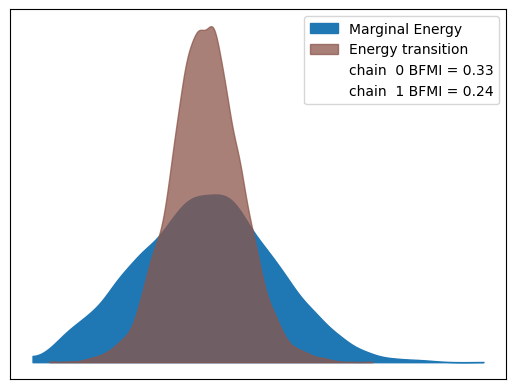

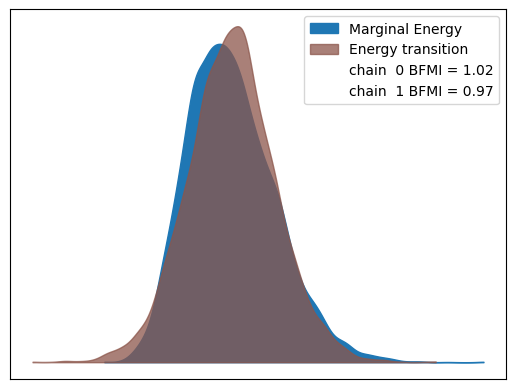

In [64]:
import arviz as az
az.plot_energy(fit_C);
az.plot_energy(fit_NC);

The diagnostic plot comparing the observed energy proposal distribution versus the empirical energy distribution of the generated HMC samples provides valuable insights into the effectiveness of the "centered" and "uncentered" Eight Schools models in terms of energy function curvature and HMC algorithm performance.

For the "centered" model, the Bayesian Fraction of Missing Information (BFMI) values are notably low (0.33 and 0.24 for the two chains), indicating a mismatch between the energy distribution of transitions and the marginal energy distribution. This discrepancy suggests potential issues with sampling efficiency, likely stemming from the "centered" parameterization's impact on the Hamiltonian Monte Carlo (HMC) algorithm's ability to explore the posterior distribution effectively.

In contrast, the "uncentered" model demonstrates much higher BFMI values (1.02 and 0.97), approaching 1, indicating a closer match between energy transitions and marginal energy distribution. This alignment implies that the "uncentered" model facilitates more efficient exploration of the posterior distribution by the HMC sampler, potentially mitigating challenges associated with energy function curvature.

Comparative analysis reveals that the diagnostic supports the notion that "uncentered" parameterizations enhance HMC algorithm performance by addressing potential pathologies in the posterior distribution, such as high curvature or "funnel" shapes, which can impede effective sampling. This conclusion is reinforced by the higher BFMI values and improved alignment between energy transition and marginal energy distributions observed in the "uncentered" model compared to the "centered" counterpart.

In summary, the diagnostic plot underscores the advantage of employing the "uncentered" model in facilitating the HMC algorithm's generation of effective samples from the posterior distribution. This finding aligns with previous conclusions regarding the benefits of "uncentering" in optimizing HMC sampling efficiency.




